In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import sklearn.metrics as metrics 
import matplotlib.pyplot as plt
from datetime import datetime

# import mpld3
# mpld3.enable_notebook()
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv('data/0A000055_VDV.dat', delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TIMESTAMP         1773 non-null   object 
 1   NOM_TILT          1773 non-null   object 
 2   ANGLE_X           1773 non-null   float64
 3   ANGLE_Y           1773 non-null   float64
 4   ANGLE_Z           1773 non-null   float64
 5   TEMPERATURE       1773 non-null   float64
 6   INTENSITE_SIGNAL  1773 non-null   int64  
 7   SIGMA             1773 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 110.9+ KB


In [3]:
# reseting 0 date to 2020-3-13 10:53:15
def to_integer_and_reset(df):
    arr = []
    print(type(datetime.strptime(df.iloc[0]['TIMESTAMP'], '%Y-%m-%d %H:%M:%S').timestamp()))
    dt_time0 = datetime.strptime(df.iloc[0]['TIMESTAMP'], '%Y-%m-%d %H:%M:%S').timestamp()
    for i in range (0,len(df)) :
        dt_time = int(datetime.strptime(df.iloc[i]['TIMESTAMP'], '%Y-%m-%d %H:%M:%S').timestamp() - dt_time0)
        #arr.append(1000000*dt_time.year + 10000*dt_time.month + 100*dt_time.day+dt_time.hour  - 2019082400)
        arr.append(dt_time)
    return arr

In [4]:
df['Time'] = to_integer_and_reset(df)

<class 'float'>


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TIMESTAMP         1773 non-null   object 
 1   NOM_TILT          1773 non-null   object 
 2   ANGLE_X           1773 non-null   float64
 3   ANGLE_Y           1773 non-null   float64
 4   ANGLE_Z           1773 non-null   float64
 5   TEMPERATURE       1773 non-null   float64
 6   INTENSITE_SIGNAL  1773 non-null   int64  
 7   SIGMA             1773 non-null   float64
 8   Time              1773 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 124.8+ KB


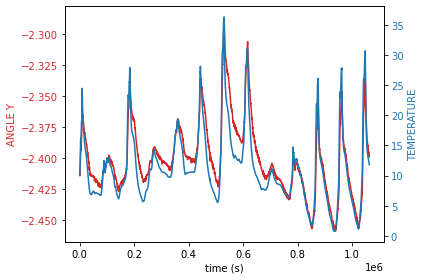

In [6]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('ANGLE Y', color=color)
ax1.plot(df['Time'], df['ANGLE_Y'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('TEMPERATURE', color=color)  # we already handled the x-label with ax1
ax2.plot(df['Time'], df['TEMPERATURE'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [7]:
X = df[['TEMPERATURE','Time']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['ANGLE_Y']

# with sklearn
regr = LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -2.4461062152343174
Coefficients: 
 [ 4.47026843e-03 -1.01902297e-08]


In [8]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [9]:
profile

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# reseting 0 date to 2020-3-13 10:53:15
def corriger(df,regr):
    arr = []
    for i in range (0,len(df)) :
        dt_time = df.iloc[i]["ANGLE_Y"] - (regr.coef_[0]*df.iloc[i]['TEMPERATURE'])
        #arr.append(1000000*dt_time.year + 10000*dt_time.month + 100*dt_time.day+dt_time.hour  - 2019082400)
        arr.append(dt_time)
    return arr

In [11]:
# reseting 0 date to 2020-3-13 10:53:15
def temperature(df,regr):
    arr = []
    for i in range (0,len(df)) :
        dt_time = regr.coef_[0]*df.iloc[i]['TEMPERATURE'] + regr.intercept_
        #arr.append(1000000*dt_time.year + 10000*dt_time.month + 100*dt_time.day+dt_time.hour  - 2019082400)
        arr.append(dt_time)
    return arr

In [12]:
df["reg-temp"] = temperature(df, regr)

In [13]:
df["ANGLE_Yc"] = corriger(df, regr)

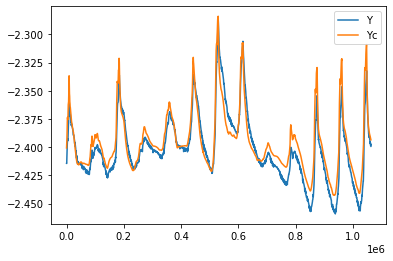

In [14]:
plt.plot(df['Time'], df['ANGLE_Y'], '-', label='Y')
plt.plot(df['Time'], df['reg-temp'], '-', label='Yc')
plt.legend(loc='best')
plt.show()

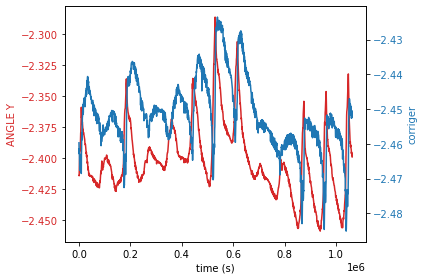

In [21]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('ANGLE Y', color=color)
ax1.plot(df['Time'], df['ANGLE_Y'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('corriger', color=color)  # we already handled the x-label with ax1
ax2.plot(df['Time'], df['ANGLE_Yc'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
from seasonal import fit_seasons

In [17]:
season_, trend = fit_seasons(df["TEMPERATURE"])

<AxesSubplot:>

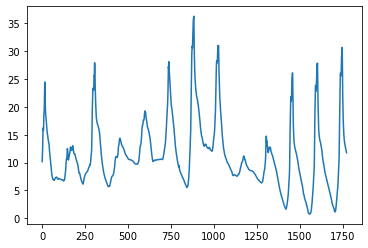

In [18]:
df["TEMPERATURE"].plot()

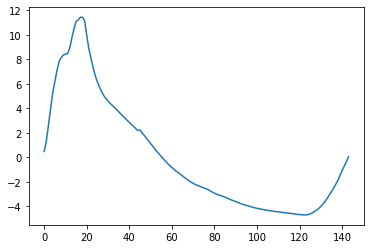

In [19]:
plt.plot(season_)

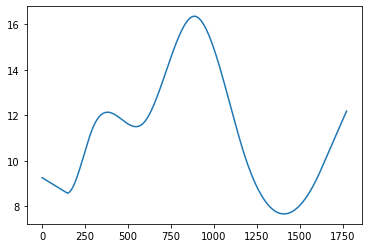

In [20]:
plt.plot(trend)